In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from scipy import stats

In [3]:
ev_df = pd.read_csv("data/ev_sales/ev_data_preprocessed.csv")
asthma_df = pd.read_csv("odds_ratio_module/combined_OR_aOR.csv")
df = ev_df.merge(asthma_df, how='left', on=['state_code', 'year'])

In [4]:
df

,State,FCEV Sales,FCEV Market Share,BEV Sales,BEV Market Share,PHEV Sales,PHEV Market Share,year,State Name,state_code,...,ZEV Mandates,population,at_risk,total_incidence,incidence_trap,PR,IR,AF,OR,aOR
0,Alabama,0,NaN,18,NaN,55,NaN,2011,Alabama,1,...,0,1123827,1025208,8530,865,0.087753,0.00832,0.101333,4.151245e-01,NaN
1,Alaska,0,NaN,2,NaN,4,NaN,2011,Alaska,2,...,0,188580,172032,1432,0,0.087753,0.00832,0.000000,8.574561e-09,NaN
2,Arizona,0,NaN,355,NaN,102,NaN,2011,Arizona,4,...,0,1615952,1480061,12315,4980,0.084094,0.00832,0.404398,1.659567e+00,1.280341
3,Arkansas,0,NaN,2,NaN,20,NaN,2011,Arkansas,5,...,0,711633,649186,5402,746,0.087753,0.00832,0.138113,5.682501e-01,NaN
4,California,19,NaN,5062,NaN,1656,NaN,2011,California,6,...,1,9244611,8433370,70167,29324,0.087753,0.00832,0.417916,1.714878e+00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,Virginia,0,0.0,5677,0.0153,1337,0.0036,2019,Virginia,51,...,0,1860848,1724639,10676,1406,0.073197,0.00619,0.131665,8.312632e-01,NaN
455,Washington,0,0.0,10256,0.0359,1916,0.0067,2019,Washington,53,...,0,1663061,1541330,9541,1532,0.073197,0.00619,0.160530,1.014282e+00,NaN
456,West Virginia,0,0.0,179,0.0035,71,0.0014,2019,West Virginia,54,...,0,359567,333248,2063,0,0.073197,0.00619,0.000000,7.694841e-09,NaN
457,Wisconsin,0,0.0,1381,0.0057,581,0.0024,2019,Wisconsin,55,...,0,1266597,1214574,7519,462,0.041074,0.00619,0.061443,3.889718e-01,0.188445


In [5]:
df['pre_trap'] = df['population']*df['PR']*df['AF']
df['ev_market_share'] = df['ev_sales']/df['total']
df['nonev_market_share'] = df['nonev_sales']/df['total']
df = df[df['OR'] != 9999]

df['ev_sales_log'] = np.log(df['ev_sales'])
df['nonev_sales_log'] = np.log(df['nonev_sales'])

C:\Users\harsh\AppData\Local\Temp\ipykernel_24012\1882760099.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ev_sales_log'] = np.log(df['ev_sales'])
C:\Users\harsh\AppData\Local\Temp\ipykernel_24012\1882760099.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nonev_sales_log'] = np.log(df['nonev_sales'])


In [6]:
def calco(df):
    return df[['ev_sales', 'nonev_sales', 'OR', 'AF', 'incidence_trap', 'pre_trap', 'ev_market_share', 'nonev_market_share', 
               'ev_sales_log', 'nonev_sales_log']].corr()

In [7]:
calco(df)

,ev_sales,nonev_sales,OR,AF,incidence_trap,pre_trap,ev_market_share,nonev_market_share,ev_sales_log,nonev_sales_log
ev_sales,1.000000,0.608648,0.288861,0.242603,0.656029,0.624538,0.708066,-0.708066,0.468238,0.376715
nonev_sales,0.608648,1.000000,0.235216,0.258892,0.805701,0.822066,0.300471,-0.300471,0.682910,0.842384
OR,0.288861,0.235216,1.000000,0.883378,0.461140,0.403938,0.364903,-0.364903,0.302948,0.180819
AF,0.242603,0.258892,0.883378,1.000000,0.463845,0.477894,0.301153,-0.301153,0.226698,0.198804
incidence_trap,0.656029,0.805701,0.461140,0.463845,1.000000,0.948353,0.440088,-0.440088,0.502181,0.590316
pre_trap,0.624538,0.822066,0.403938,0.477894,0.948353,1.000000,0.421635,-0.421635,0.512444,0.610749
ev_market_share,0.708066,0.300471,0.364903,0.301153,0.440088,0.421635,1.000000,-1.000000,0.635133,0.171990
nonev_market_share,-0.708066,-0.300471,-0.364903,-0.301153,-0.440088,-0.421635,-1.000000,1.000000,-0.635133,-0.171990
ev_sales_log,0.468238,0.682910,0.302948,0.226698,0.502181,0.512444,0.635133,-0.635133,1.000000,0.769719
nonev_sales_log,0.376715,0.842384,0.180819,0.198804,0.590316,0.610749,0.171990,-0.171990,0.769719,1.000000


In [8]:
tdf = df[df['ZEV Mandates'] == 1]
calco(tdf)

,ev_sales,nonev_sales,OR,AF,incidence_trap,pre_trap,ev_market_share,nonev_market_share,ev_sales_log,nonev_sales_log
ev_sales,1.000000,0.806656,0.453869,0.436639,0.675835,0.652886,0.867855,-0.867855,0.648650,0.569814
nonev_sales,0.806656,1.000000,0.434064,0.584184,0.916592,0.914189,0.591081,-0.591081,0.857623,0.871265
OR,0.453869,0.434064,1.000000,0.736292,0.580899,0.511189,0.290839,-0.290839,0.421421,0.433179
AF,0.436639,0.584184,0.736292,1.000000,0.664115,0.702963,0.245704,-0.245704,0.321596,0.521633
incidence_trap,0.675835,0.916592,0.580899,0.664115,1.000000,0.947551,0.601221,-0.601221,0.631340,0.710814
pre_trap,0.652886,0.914189,0.511189,0.702963,0.947551,1.000000,0.571100,-0.571100,0.627056,0.716637
ev_market_share,0.867855,0.591081,0.290839,0.245704,0.601221,0.571100,1.000000,-1.000000,0.732461,0.397618
nonev_market_share,-0.867855,-0.591081,-0.290839,-0.245704,-0.601221,-0.571100,-1.000000,1.000000,-0.732461,-0.397618
ev_sales_log,0.648650,0.857623,0.421421,0.321596,0.631340,0.627056,0.732461,-0.732461,1.000000,0.881123
nonev_sales_log,0.569814,0.871265,0.433179,0.521633,0.710814,0.716637,0.397618,-0.397618,0.881123,1.000000


In [9]:
tdf = df[df['ZEV Mandates'] == 0]
calco(tdf)

,ev_sales,nonev_sales,OR,AF,incidence_trap,pre_trap,ev_market_share,nonev_market_share,ev_sales_log,nonev_sales_log
ev_sales,1.000000,0.587259,0.137851,0.057199,0.380336,0.374752,0.575233,-0.575233,0.736022,0.571349
nonev_sales,0.587259,1.000000,0.087098,0.092330,0.781693,0.805971,-0.031866,0.031866,0.605599,0.848367
OR,0.137851,0.087098,1.000000,0.914503,0.435599,0.332714,0.318341,-0.318341,0.195476,0.068529
AF,0.057199,0.092330,0.914503,1.000000,0.436991,0.410901,0.251484,-0.251484,0.130811,0.086525
incidence_trap,0.380336,0.781693,0.435599,0.436991,1.000000,0.936534,-0.015802,0.015802,0.468313,0.689474
pre_trap,0.374752,0.805971,0.332714,0.410901,0.936534,1.000000,0.009035,-0.009035,0.471295,0.700565
ev_market_share,0.575233,-0.031866,0.318341,0.251484,-0.015802,0.009035,1.000000,-1.000000,0.548610,0.002870
nonev_market_share,-0.575233,0.031866,-0.318341,-0.251484,0.015802,-0.009035,-1.000000,1.000000,-0.548610,-0.002870
ev_sales_log,0.736022,0.605599,0.195476,0.130811,0.468313,0.471295,0.548610,-0.548610,1.000000,0.749596
nonev_sales_log,0.571349,0.848367,0.068529,0.086525,0.689474,0.700565,0.002870,-0.002870,0.749596,1.000000


In [10]:
calco(df[df['state_code'] != 6])

,ev_sales,nonev_sales,OR,AF,incidence_trap,pre_trap,ev_market_share,nonev_market_share,ev_sales_log,nonev_sales_log
ev_sales,1.000000,0.595615,0.140589,0.042909,0.345957,0.338672,0.562108,-0.562108,0.740967,0.584414
nonev_sales,0.595615,1.000000,0.094127,0.104696,0.779807,0.806808,-0.045257,0.045257,0.605284,0.857526
OR,0.140589,0.094127,1.000000,0.878995,0.444577,0.339806,0.255445,-0.255445,0.219526,0.106056
AF,0.042909,0.104696,0.878995,1.000000,0.444553,0.433595,0.178731,-0.178731,0.132261,0.115981
incidence_trap,0.345957,0.779807,0.444577,0.444553,1.000000,0.940962,-0.057751,0.057751,0.452187,0.705164
pre_trap,0.338672,0.806808,0.339806,0.433595,0.940962,1.000000,-0.036061,0.036061,0.448539,0.715165
ev_market_share,0.562108,-0.045257,0.255445,0.178731,-0.057751,-0.036061,1.000000,-1.000000,0.563510,-0.000322
nonev_market_share,-0.562108,0.045257,-0.255445,-0.178731,0.057751,0.036061,-1.000000,1.000000,-0.563510,0.000322
ev_sales_log,0.740967,0.605284,0.219526,0.132261,0.452187,0.448539,0.563510,-0.563510,1.000000,0.743145
nonev_sales_log,0.584414,0.857526,0.106056,0.115981,0.705164,0.715165,-0.000322,0.000322,0.743145,1.000000


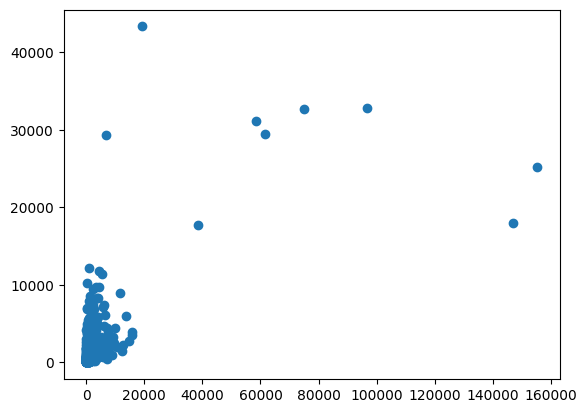

In [11]:
x, y = df['ev_sales'], df['incidence_trap']

plt.scatter(x, y)

[[1.         0.35529206]
 [0.35529206 1.        ]]


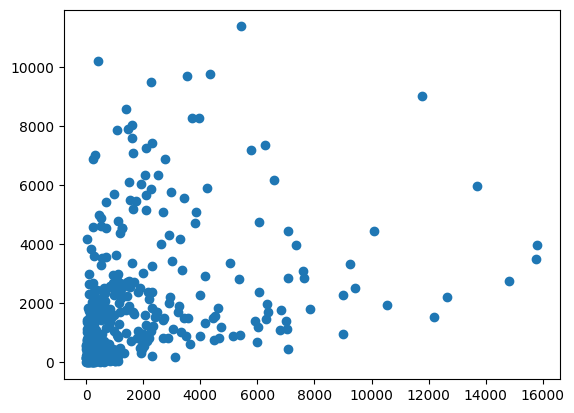

In [12]:
# remove outliers

def remove_out(df, cols):
    for col in cols:
        df = df[(np.abs(stats.zscore(df[col])) < 3)]
    return df
        
tdf = remove_out(df, ['ev_sales', 'incidence_trap'])
x, y = tdf['ev_sales'], tdf['incidence_trap']
print(np.corrcoef(x,y))
plt.scatter(x, y)

[[1.         0.27289872]
 [0.27289872 1.        ]]


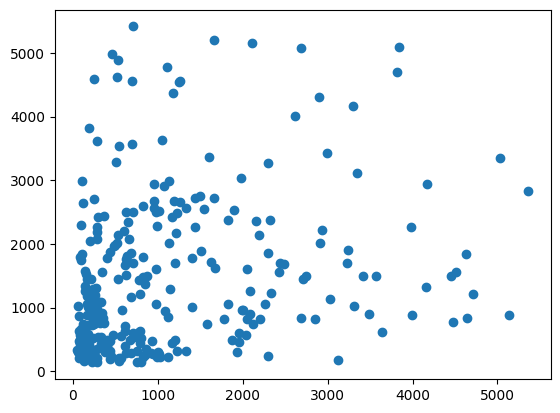

In [13]:
# ev_sales and incidence_trap

min_trap, max_trap = np.percentile(df['incidence_trap'], 10), np.percentile(df['incidence_trap'], 90)
min_ev, max_ev = np.percentile(df['ev_sales'], 10), np.percentile(df['ev_sales'], 90)

filtr = (df['ev_sales'] < max_ev) & (df['ev_sales'] > min_ev) & (df['incidence_trap'] < max_trap) & (df['incidence_trap'] > min_trap)
tdf = df[filtr]
x, y = tdf['ev_sales'], tdf['incidence_trap']
print(np.corrcoef(x,y))
plt.scatter(x, y)

[[1.         0.63398799]
 [0.63398799 1.        ]]


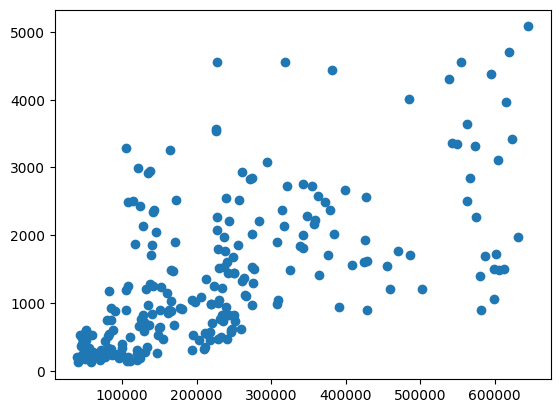

In [14]:
# non ev sales

tdf = df[df['year']>=2013]
min_trap, max_trap = np.percentile(tdf['incidence_trap'], 10), np.percentile(tdf['incidence_trap'], 90)
min_ev, max_ev = np.percentile(tdf['nonev_sales'], 10), np.percentile(tdf['nonev_sales'], 90)

filtr = (tdf['nonev_sales'] < max_ev) & (tdf['nonev_sales'] > min_ev) & (tdf['incidence_trap'] < max_trap) & (tdf['incidence_trap'] > min_trap)
tdf = tdf[filtr]
x, y = tdf['nonev_sales'], tdf['incidence_trap']
print(np.corrcoef(x,y))
plt.scatter(x, y)

In [15]:
tdf = tdf[tdf['year']>2013]
x, y = tdf['nonev_sales'], tdf['incidence_trap']
print(np.corrcoef(x,y))

[[1.         0.63183825]
 [0.63183825 1.        ]]


In [16]:
replace_year = {i:j for i, j in zip(range(2011, 2020), range(1, 12))}
df['year_fixed'] = df['year'].replace(replace_year)

C:\Users\harsh\AppData\Local\Temp\ipykernel_24012\1956621198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_fixed'] = df['year'].replace(replace_year)


In [17]:
df = df.rename(columns={'ZEV Mandates': 'ZEV_Mandates', 'EPA Region': 'EPA_Region'})

In [18]:
df.to_csv("output_files/for_R.csv", index=False)

In [19]:
tdf = df[df['year']>=2013]
min_trap, max_trap = np.percentile(tdf['incidence_trap'], 10), np.percentile(tdf['incidence_trap'], 90)
min_nonev, max_nonev = np.percentile(tdf['nonev_sales'], 10), np.percentile(tdf['nonev_sales'], 90)
min_ev, max_ev = np.percentile(tdf['ev_sales'], 10), np.percentile(tdf['ev_sales'], 90)


filtr = (tdf['ev_sales'] < max_ev) & (tdf['ev_sales'] > min_ev) & (tdf['nonev_sales'] < max_nonev) & (tdf['nonev_sales'] > min_nonev) & (tdf['incidence_trap'] < max_trap) & (tdf['incidence_trap'] > min_trap)
tdf = tdf[filtr]
tdf.to_csv("output_files/for_R_filter_by_per_v2.csv", index=False)

In [20]:
def get_IQR(df, col):
    return np.percentile(tdf[col], 75) - np.percentile(tdf[col], 25)

-7.366695e-02 * get_IQR(tdf, 'ev_sales'),  5.163572e-03* get_IQR(tdf, 'nonev_sales')

(-126.41248619999999, 796.233129544)

In [21]:
 -0.01397* get_IQR(tdf, 'ev_sales')

-23.97252

In [21]:
get_IQR(tdf, 'ev_sales')

1716.0

In [23]:
get_IQR(tdf, 'nonev_sales')

154202.0

In [25]:
154202.0/796.2

193.6724441095202